# Programming Lab 1 

## Handout 5 

## Lara Schmalenstroer (s0laschm@uni-bonn.de)

### Ex.1 (4pts) Reading in distance matrices
Assume that all the distances have already been calculated and are stored in a text file similar to the Blosum matrices of the previous weeks. Two files, one containing pairwise distances between 5 objects (small-distances.txt) and one containing pairwise distances between 13 objects (distances.txt) are given. Write a function that is able to read distance matrices and store them, for instance, in a dictionary of dictionaries so that distances can be accessed like dist['D']['B'].

In [1]:
def read_distance_matrix(filename):
    with open(filename,'r') as file:
        content=file.readlines()
    list_indices=[]
    for i in range(len(content)):
        content[i]=content[i].replace('\n','').split(' ')
        list_indices.append([])
        for j in range(len(content[i])):
            if content[i][j]=='':
                list_indices[i].append(j)
    i=len(list_indices)-1
    while i>-1:
        j=len(list_indices[i])-1
        while j>-1:
            index=list_indices[i][j]
            content[i].pop(index)
            j-=1
        i-=1
    distances={}
    names=content[0]
    content=content[1:]
    for i in range(len(content)):
        distances[content[i][0]]={}
        dict_t={}
        for j in range(1,len(content[i])):
            letter=names[j-1]
            dict_t[letter]=int(content[i][j])
            if j==len(content[i])-1:
                distances[content[i][0]]=dict_t
    return distances

In [16]:
small=read_distance_matrix('small-distances.txt')
small

{'A': {'A': 0, 'B': 4, 'C': 1, 'D': 2, 'E': 5},
 'B': {'A': 4, 'B': 0, 'C': 5, 'D': 2, 'E': 3},
 'C': {'A': 1, 'B': 5, 'C': 0, 'D': 3, 'E': 6},
 'D': {'A': 2, 'B': 2, 'C': 3, 'D': 0, 'E': 3},
 'E': {'A': 5, 'B': 3, 'C': 6, 'D': 3, 'E': 0}}

In [18]:
dist=read_distance_matrix('distances.txt')
print(dist)

{'A': {'A': 0, 'B': 2, 'C': 5, 'D': 9, 'E': 5, 'F': 5, 'G': 3, 'H': 7, 'I': 6, 'J': 2, 'K': 1, 'L': 1, 'M': 8}, 'B': {'A': 2, 'B': 0, 'C': 7, 'D': 11, 'E': 7, 'F': 7, 'G': 5, 'H': 9, 'I': 8, 'J': 4, 'K': 3, 'L': 1, 'M': 8}, 'C': {'A': 5, 'B': 7, 'C': 0, 'D': 6, 'E': 4, 'F': 4, 'G': 6, 'H': 2, 'I': 5, 'J': 3, 'K': 6, 'L': 6, 'M': 9}, 'D': {'A': 9, 'B': 11, 'C': 6, 'D': 0, 'E': 8, 'F': 4, 'G': 10, 'H': 6, 'I': 3, 'J': 7, 'K': 10, 'L': 10, 'M': 15}, 'E': {'A': 5, 'B': 7, 'C': 4, 'D': 8, 'E': 0, 'F': 4, 'G': 2, 'H': 6, 'I': 5, 'J': 3, 'K': 4, 'L': 6, 'M': 13}, 'F': {'A': 5, 'B': 7, 'C': 4, 'D': 4, 'E': 4, 'F': 0, 'G': 6, 'H': 4, 'I': 1, 'J': 3, 'K': 6, 'L': 6, 'M': 13}, 'G': {'A': 3, 'B': 5, 'C': 6, 'D': 10, 'E': 2, 'F': 6, 'G': 0, 'H': 8, 'I': 7, 'J': 3, 'K': 2, 'L': 4, 'M': 11}, 'H': {'A': 7, 'B': 9, 'C': 2, 'D': 6, 'E': 6, 'F': 4, 'G': 8, 'H': 0, 'I': 5, 'J': 5, 'K': 8, 'L': 8, 'M': 9}, 'I': {'A': 6, 'B': 8, 'C': 5, 'D': 3, 'E': 5, 'F': 1, 'G': 7, 'H': 5, 'I': 0, 'J': 4, 'K': 7, 'L': 7,

### Ex.2 (4pts) Number of elements of a nested tuple
First, write a function that counts the number of elementary objects in a nested tuple. I.e., the function should return 3 for (('A','B'),'C') and 5 for ((('A','B'),'C'),('D','E')). This function will be helpful when determining cluster distances.

In [5]:
def no_of_objects_nested_tuple(nested_tuple):
    string_tuple=str(nested_tuple)
    forbidden={'(',')',',',"'",' '}
    counter=0
    for char in string_tuple:
        if char not in forbidden:
            counter+=1
    return counter

### Ex.3 (4pts) Merging clusters
Write a function taking three parameters: a distance matrix (i.e. a dictionary of dictionaries as in exercise 1) and two clusters (represented as strings/tuples) that merges two clusters by updating the distance matrix.

In [6]:
def merge_cluster(clusterA,clusterB,dist_matrix):
    name_new=(clusterA,clusterB)
    elementsA=no_of_objects_nested_tuple(clusterA)
    elementsB=no_of_objects_nested_tuple(clusterB)
    dist_matrix[name_new]={}
    dist_matrix[name_new]={key:(1/(elementsA+elementsB))*(elementsA*dist_matrix[clusterA][key]+\
                                                      elementsB*dist_matrix[clusterB][key]) \
                           for key in dist_matrix[clusterA]}
    dist_matrix[name_new][name_new]=0
    del dist_matrix[clusterA]
    del dist_matrix[clusterB]
    for key in dist_matrix:
        if key!=name_new:
            dist_matrix[key][name_new]=dist_matrix[name_new][key]
        if clusterA in dist_matrix[key].keys():
            del dist_matrix[key][clusterA]
        if clusterB in dist_matrix[key].keys():
            del dist_matrix[key][clusterB]
    return dist_matrix

In [7]:
merge_cluster('A','B',small)

{'C': {'C': 0, 'D': 3, 'E': 6, ('A', 'B'): 3.0},
 'D': {'C': 3, 'D': 0, 'E': 3, ('A', 'B'): 2.0},
 'E': {'C': 6, 'D': 3, 'E': 0, ('A', 'B'): 4.0},
 ('A', 'B'): {'C': 3.0, 'D': 2.0, 'E': 4.0, ('A', 'B'): 0}}

### Ex.4 (4pts) Find closest clusters
Write a function that takes a distance matrix as input and returns the two clusters that should be merged ,i.e. whose distance is smallest.

In [8]:
def closest_clusters(dist_matrix):
    min_dist=10000
    if len(dist_matrix)==2:
        list_cluster=[]
        for key in dist_matrix:
            list_cluster.append(key)
        clusterA=list_cluster[0]
        clusterB=list_cluster[1]
#     clusterA=''
#     clusterB=''
    else:
        for key in dist_matrix:
            for k2 in dist_matrix[key]:
                if dist_matrix[key][k2]<min_dist and key!=k2:
                    min_dist=dist_matrix[key][k2]
                    clusterA=key
                    clusterB=k2
    return (clusterA,clusterB)

In [9]:
closest_clusters(small)

('D', ('A', 'B'))

### Ex.5 (4pts) Hierarchical clustering
Write a function implementing the hierarchical clustering according to the pseudocode. The function should return the final clustering as a tuple and the heights for each cluster. The height should be stored as a dictionary, where the key is the cluster and the value the height. Test your program using the two files small-distances.txt and distances.txt. To visualize the result you can use the function showtree provided in showtree.py by copying that file from the workshop folder and using from showtree import showtree.

In [11]:
def hierarchical_clustering(dist_matrix):
    F=tuple(key for key in dist_matrix)
    heights={key:0 for key in dist_matrix}
    while len(F)>1:
        new_cluster=closest_clusters(dist_matrix)
        clusterA=new_cluster[0]
        clusterB=new_cluster[1]
        heights[new_cluster]=dist_matrix[clusterA][clusterB]/2
        merge_cluster(clusterA,clusterB,dist_matrix)
        F=tuple(dist_matrix.keys())
    return F[0],heights

In [12]:
hierarchical_clustering(small)

((('A', 'C'), ('E', ('B', 'D'))),
 {'A': 0,
  'B': 0,
  'C': 0,
  'D': 0,
  'E': 0,
  ('A', 'C'): 0.5,
  ('B', 'D'): 1.0,
  ('E', ('B', 'D')): 1.5,
  (('A', 'C'), ('E', ('B', 'D'))): 2.083333333333333})

In [13]:
hierarchical_clustering(dist)

(('M',
  (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))),
   (('C', 'H'), ('D', ('F', 'I'))))),
 {'A': 0,
  'B': 0,
  'C': 0,
  'D': 0,
  'E': 0,
  'F': 0,
  'G': 0,
  'H': 0,
  'I': 0,
  'J': 0,
  'K': 0,
  'L': 0,
  'M': 0,
  ('A', 'K'): 0.5,
  ('B', 'L'): 0.5,
  ('F', 'I'): 0.5,
  ('C', 'H'): 1.0,
  ('E', 'G'): 1.0,
  (('A', 'K'), ('B', 'L')): 1.0,
  ('J', ('E', 'G')): 1.5,
  ('D', ('F', 'I')): 1.75,
  ((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))): 2.0,
  (('C', 'H'), ('D', ('F', 'I'))): 2.5,
  (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))),
   (('C', 'H'), ('D', ('F', 'I')))): 3.3428571428571425,
  ('M',
   (((('A', 'K'), ('B', 'L')), ('J', ('E', 'G'))),
    (('C', 'H'), ('D', ('F', 'I'))))): 5.25})

In [14]:
from showtree import showtree

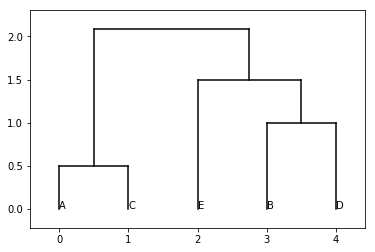

In [17]:
tree_s,height_s = hierarchical_clustering(small)
showtree(tree_s,height_s)

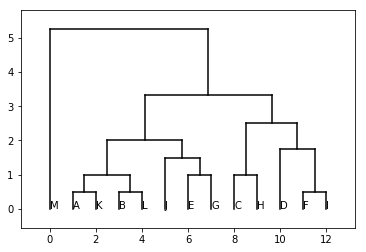

In [19]:
tree_d,height_d = hierarchical_clustering(dist)
showtree(tree_d,height_d)

In [20]:
from showtree import asciitree

ImportError: cannot import name 'asciitree' from 'showtree' (C:\Users\Lara\Programming_Lab_1\showtree.py)